In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:\Machine Learning - Course\Sample Data Sets\googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.shape

(10841, 13)

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

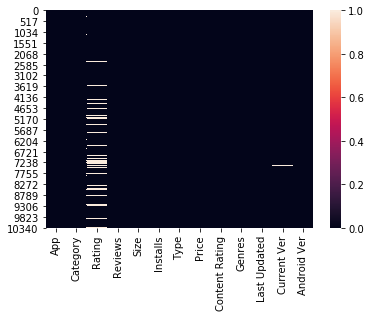

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data Cleaning

In [11]:
df.loc[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Since there is only one outlier in Rating whose rating is 19. So we can simply remove above record.

In [12]:
df.drop(df.loc[df['Rating']>5].index,inplace=True)

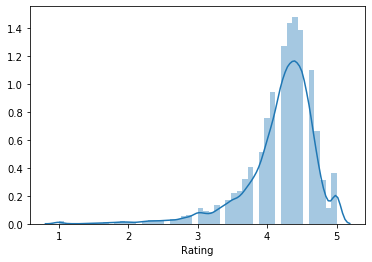

In [13]:
sns.distplot(df['Rating'].dropna(),kde=True)

It shows that our dataset is right skewe, so it better to replace missing values with Median only. As Rating distribution is right skewed.

In [14]:
df['Rating'].fillna(df['Rating'].median(),inplace=True)

In [15]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [16]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

## Filling Categorical data like  Type, Current ver & Andriod ver

In [17]:
# df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)
# df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
# df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace=True)

In [18]:
df['Type'].fillna(df['Type'].mode().values[0],inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode().values[0],inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode().values[0],inplace=True)

In [19]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$3.61         1
$1.96         1
$4.85         1
$18.99        1
$2.90         1
Name: Price, Length: 92, dtype: int64

## Need to remove $ sign from price column 

In [22]:
def Replace_Dollar(col):
    nums=col[0]
    if '$' in nums:
        return nums.replace('$','')
    else:
        return nums

In [23]:
df['Price']=df[['Price']].apply(Replace_Dollar,axis=1)

In [24]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
#Changing price column format into float, as after replacing $ sign, still it is string
df['Price']=df['Price'].astype(float)

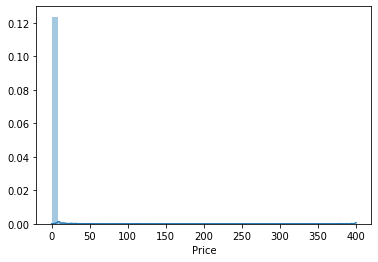

In [26]:
sns.distplot(df['Price'])

In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Need to remove + sign from Installs And M sign from Size. Because it is understood that this is in MB only 

In [28]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else x)

In [29]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',','') if ',' in x else x)

In [30]:
df['Installs'] = df['Installs'].astype(int)

In [31]:
# df['Size'] = df['Size'].apply(lambda x: x.replace('M','') if 'M' in x else x)
# df['Size'] = df['Size'].astype(float)
df['Size'].value_counts()
#Size column has various variation due to which unable to convert in numeric

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
551k                     1
779k                     1
874k                     1
241k                     1
240k                     1
Name: Size, Length: 461, dtype: int64

# Univariate Analysis & Bivariate Analysis

In [32]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [33]:
df['Reviews'] = df['Reviews'].astype(int)

In [34]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [35]:
df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.063166,0.045496,-0.019318
Reviews,0.063166,1.000000,0.643122,-0.009667
Installs,0.045496,0.643122,1.000000,-0.011689
Price,-0.019318,-0.009667,-0.011689,1.000000


It shows that Rating & Installs has positive corelation, which means if Rating goes up, Installs will also rise. <br>
Also it shows that there is positive relationship between Rating & Reviews, which means if rating goes up, reviews will also rise

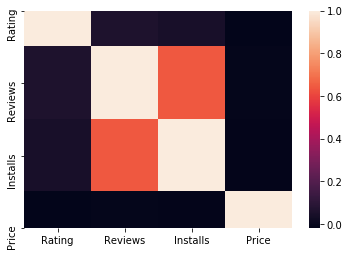

In [36]:
sns.heatmap(df.corr())

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null int32
Size              10840 non-null object
Installs          10840 non-null int32
Type              10840 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10840 non-null object
Android Ver       10840 non-null object
dtypes: float64(2), int32(2), object(9)
memory usage: 1.1+ MB


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000001B1E4BB4148>>

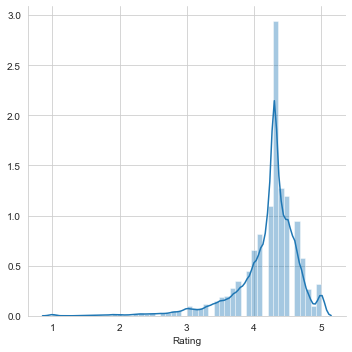

In [38]:
sns.set_style('whitegrid')
sns.FacetGrid(data=df,size=5).map(sns.distplot,'Rating').add_legend

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000001B1E4B5D708>>

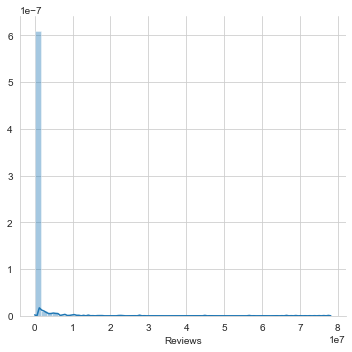

In [39]:
sns.set_style('whitegrid')
sns.FacetGrid(data=df,size=5).map(sns.distplot,'Reviews').add_legend

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000001B1E4DF7788>>

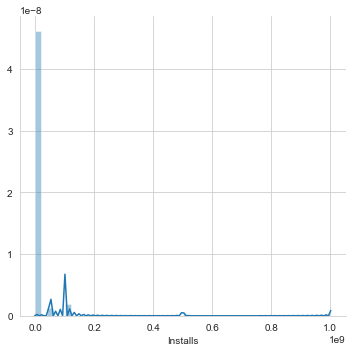

In [40]:
sns.set_style('whitegrid')
sns.FacetGrid(data=df,size=5).map(sns.distplot,'Installs').add_legend

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000001B1E4ED5388>>

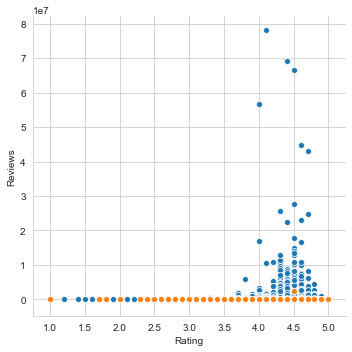

In [41]:
sns.set_style('whitegrid')
sns.FacetGrid(data=df,hue='Type',size=5).map(sns.scatterplot,'Rating','Reviews').add_legend

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


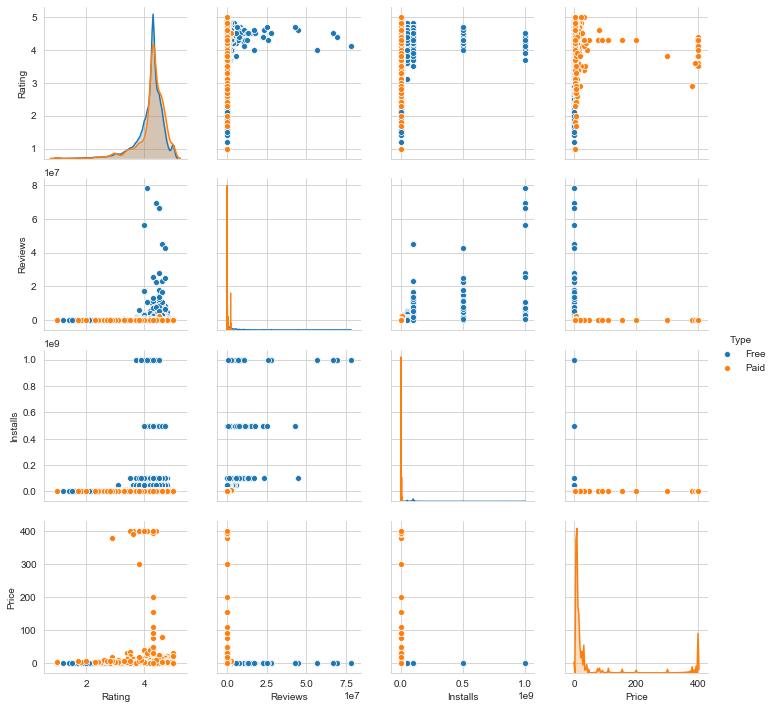

In [42]:
sns.pairplot(data=df,hue='Type')

# Bivariate Analysis 

In [43]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


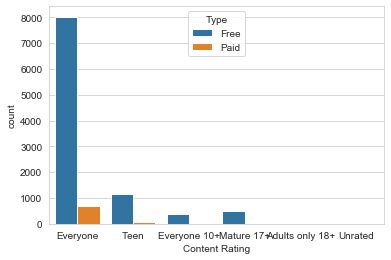

In [44]:
sns.countplot(x='Content Rating',data=df,hue='Type')

It seems that in each cateogry no. of apps is greater of "Free" apps only. And it is higher in Everyone category.

In [45]:
Ttl_apps = df.groupby('Category').count()['App'].reset_index().sort_values('App')
val_5 = Ttl_apps['App'].nlargest(5).iloc[-1]
val_5
Ttl_apps = Ttl_apps.loc[Ttl_apps['App']>=val_5]
Ttl_apps

,Category,App
4,BUSINESS,460
20,MEDICAL,463
29,TOOLS,843
14,GAME,1144
11,FAMILY,1972


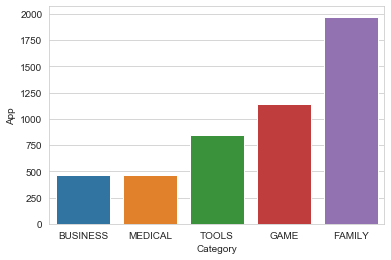

In [46]:
sns.barplot(x='Category',y='App',data=Ttl_apps)

It shows Top5 category apps received in this dataset, in which Family category is on top.

In [47]:
GD = df.groupby('Category').mean()[['Rating','Reviews','Installs','Price']].reset_index()
GD

,Category,Rating,Reviews,Installs,Price
0,ART_AND_DESIGN,4.355385,2.637600e+04,1.912894e+06,0.091846
1,AUTO_AND_VEHICLES,4.205882,1.369019e+04,6.250613e+05,0.158471
2,BEAUTY,4.283019,7.476226e+03,5.131519e+05,0.000000
3,BOOKS_AND_REFERENCE,4.335498,9.506090e+04,8.318050e+06,0.518485
4,BUSINESS,4.182391,3.033598e+04,2.178076e+06,0.402761
5,COMICS,4.160000,5.638793e+04,9.347692e+05,0.000000
6,COMMUNICATION,4.180103,2.107138e+06,8.435989e+07,0.214832
7,DATING,4.025641,3.115931e+04,1.129533e+06,0.134316
8,EDUCATION,4.388462,2.538191e+05,5.586231e+06,0.115128
9,ENTERTAINMENT,4.126174,3.971688e+05,1.925611e+07,0.053557


In [48]:
GD2 = df.groupby(['Category','Type','Content Rating']).sum()[['Rating','Reviews','Installs','Price']].reset_index().sort_values('Price')
val_5 = GD2['Price'].nlargest(5).iloc[-1]
GD2 = GD2.loc[GD2['Price']>=val_5]
GD2
#This will give me top5 records for particular category.

,Category,Type,Content Rating,Rating,Reviews,Installs,Price
66,FINANCE,Paid,Teen,4.1,129.0,1000.0,399.99
104,MEDICAL,Paid,Everyone,434.8,29180.0,897933.0,1378.00
59,FAMILY,Paid,Everyone,627.8,778567.0,6816994.0,2182.94
92,LIFESTYLE,Paid,Everyone,66.4,46781.0,1173010.0,2352.90
65,FINANCE,Paid,Everyone,62.9,23069.0,184602.0,2500.84


Above table is top 5 categories of Product in terms of Price, with their Rating, Reviws, Installs and other information.

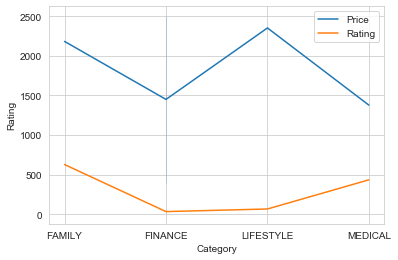

In [70]:
sns.lineplot(x='Category',y='Price',data=GD2,legend='brief',label='Price')
sns.lineplot(x='Category',y='Rating',data=GD2,legend='brief',label='Rating')


Showing Comparison between Ratings & Prices for top 5 category apps.

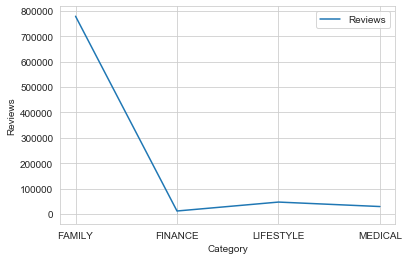

In [68]:
sns.lineplot(x='Category',y='Reviews',data=GD2,legend='brief',label='Reviews')

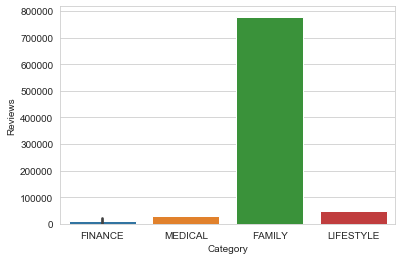

In [51]:
sns.barplot(x='Category',y='Reviews',data=GD2)

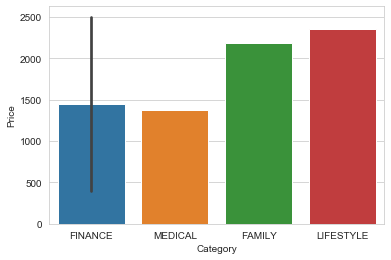

In [52]:
sns.barplot(x='Category',y='Price',data=GD2)

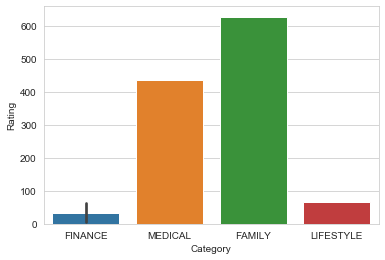

In [53]:
sns.barplot(x='Category',y='Rating',data=GD2)

In [54]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
type = pd.get_dummies(df['Type'])
cr = pd.get_dummies(df['Content Rating'])

In [56]:
df.drop(['Type','Content Rating'],axis=1,inplace=True)

In [57]:
pd.concat([df,type,cr],axis=1)

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Free,Paid,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,1,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,0.0,Education,"July 25, 2017",1.48,4.1 and up,1,0,0,1,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,0.0,Education,"July 6, 2018",1,4.1 and up,1,0,0,1,0,0,0,0
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000,0.0,Medical,"January 20, 2017",1,2.2 and up,1,0,0,1,0,0,0,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,0.0,Books & Reference,"January 19, 2015",Varies with device,Varies with device,1,0,0,0,0,1,0,0
